## Preparing Data For LSTM Model

In [54]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [55]:
AOI = 'spy'

In [56]:

data_train = pd.read_csv(f'./p_data/{AOI}_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Date'])

data_train

,fvx_close,tnx_close,vix_close,DFF,spy_close,spy_volume,DeltaPrice,Zscore,SMA100,SMA200
0,4.530,4.815,29.780001,5.40,117.349998,10067800.0,2.339996,-1.329967,63.254150,77.781684
1,4.493,4.791,30.959999,5.38,114.199997,15083900.0,-3.150002,-1.947728,62.824875,77.561109
2,4.441,4.768,31.930000,5.14,112.260002,19004600.0,-1.939995,-2.049258,62.403375,77.294734
3,4.382,4.708,32.840000,5.05,111.120003,28624800.0,-1.139999,-1.913244,62.028125,77.027188
4,4.480,4.799,30.450001,5.04,114.480003,12861700.0,3.360001,-0.940018,61.657375,76.784938
...,...,...,...,...,...,...,...,...,...,...
4212,2.251,2.485,9.900000,1.42,267.510010,78720900.0,-0.069977,1.052659,148.842500,143.127300
4213,2.237,2.467,10.250000,1.42,267.190002,45244400.0,-0.320007,0.704789,148.976700,143.257200
4214,2.199,2.414,10.470000,1.42,267.320007,57751000.0,0.130005,0.700043,149.108000,143.381750
4215,2.234,2.432,10.180000,1.42,267.869995,45116100.0,0.549988,1.174825,149.236900,143.508000


In [57]:
data_test = pd.read_csv(f'./p_data/{AOI}_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Date'])

data_test

,fvx_close,tnx_close,vix_close,DFF,spy_close,spy_volume,DeltaPrice,Zscore,SMA100,SMA200
0,2.250,2.465,9.770000,1.33,268.769989,86655700.0,1.910004,2.723571,149.473100,143.749900
1,2.247,2.447,9.150000,1.42,270.470001,90070400.0,1.700012,4.419999,149.616800,143.883900
2,2.268,2.453,9.220000,1.42,271.609985,80636400.0,1.139984,3.752096,149.806800,144.025000
3,2.285,2.476,9.220000,1.42,273.420013,83524000.0,1.810028,3.715703,149.988900,144.177500
4,2.285,2.480,9.520000,1.42,273.920013,57319200.0,0.500000,2.822429,150.168800,144.333650
...,...,...,...,...,...,...,...,...,...,...
961,1.183,1.619,15.980000,0.08,455.959991,56075100.0,0.410004,1.527512,363.326501,344.567051
962,1.138,1.529,16.980000,0.08,453.940002,72438000.0,-2.019989,1.060143,363.761701,344.890551
963,1.188,1.568,16.530001,0.08,458.320007,51437900.0,4.380005,1.465985,364.195701,345.220951
964,1.188,1.557,16.260000,0.08,459.250000,70108200.0,0.929993,1.375413,364.670301,345.561851


In [58]:
window_size = 7

In [60]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [61]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [ ]:
# data_train[i, 0] is most likely wrong zero should be whatever training column is (delta_price). Also, consider reording columns so that things make more sense.

In [69]:
data_test[7]

array([0.70984458, 0.71882996, 0.0084308 , 0.53526971, 0.1932599 ,
       0.17847984, 0.61917916, 0.8518994 , 0.00421739, 0.00438341])

In [59]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


KeyError: (7, 0)

In [53]:
print(Y_train)

[0.87339607 0.86698029 0.85393498 ... 0.35243794 0.35992299 0.35393499]


In [22]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [23]:
X_train.shape, Y_train.shape

((4210, 7, 10), (4210,))

In [24]:
print(X_train)
print(Y_train)

[[[0.85094098 0.83289062 0.28778584 ... 0.56284157 0.31530217 0.44676542]
  [0.84302819 0.82709488 0.30423869 ... 0.52889305 0.3118886  0.44491226]
  [0.83190757 0.82154072 0.31776352 ... 0.52331358 0.30853685 0.4426743 ]
  ...
  [0.84024804 0.82902676 0.29712772 ... 0.58427085 0.3026047  0.43839124]
  [0.84687766 0.84061824 0.27746794 ... 0.60682942 0.29966894 0.43625359]
  [0.87981175 0.87346047 0.24958171 ... 0.64012392 0.29688929 0.43409272]]

 [[0.84302819 0.82709488 0.30423869 ... 0.52889305 0.3118886  0.44491226]
  [0.83190757 0.82154072 0.31776352 ... 0.52331358 0.30853685 0.4426743 ]
  [0.81928994 0.80705148 0.33045175 ... 0.53078811 0.30555288 0.44042651]
  ...
  [0.84687766 0.84061824 0.27746794 ... 0.60682942 0.29966894 0.43625359]
  [0.87981175 0.87346047 0.24958171 ... 0.64012392 0.29688929 0.43409272]
  [0.87339607 0.87056272 0.27105409 ... 0.60496585 0.29383152 0.43197134]]

 [[0.83190757 0.82154072 0.31776352 ... 0.52331358 0.30853685 0.4426743 ]
  [0.81928994 0.807051

## Training LSTM Model

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


2021-12-29 22:36:27.973724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-29 22:36:27.973783: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
regressor = Sequential()

#R1
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

#R2
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.3))

#R3
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.4))

#R4
regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

2021-12-29 22:36:29.839317: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-29 22:36:29.839392: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-29 22:36:29.839428: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2021-12-29 22:36:29.839923: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             12200     
                                                                 
 dropout (Dropout)           (None, 7, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 60)             26640     
                                                                 
 dropout_1 (Dropout)         (None, 7, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 7, 80)             45120     
                                                                 
 dropout_2 (Dropout)         (None, 7, 80)             0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [29]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
421/421 [==============================] - 8s 13ms/step - loss: 0.0173
Epoch 2/10
421/421 [==============================] - 5s 11ms/step - loss: 0.0064
Epoch 3/10
421/421 [==============================] - 4s 10ms/step - loss: 0.0052
Epoch 4/10
421/421 [==============================] - 4s 9ms/step - loss: 0.0044
Epoch 5/10
421/421 [==============================] - 4s 10ms/step - loss: 0.0040
Epoch 6/10
421/421 [==============================] - 4s 9ms/step - loss: 0.0035
Epoch 7/10
421/421 [==============================] - 4s 8ms/step - loss: 0.0033
Epoch 8/10
421/421 [==============================] - 4s 10ms/step - loss: 0.0031
Epoch 9/10
421/421 [==============================] - 4s 9ms/step - loss: 0.0030
Epoch 10/10
421/421 [==============================] - 4s 10ms/step - loss: 0.0030


## Preparing Test Set For LSTM Prediction

In [30]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [31]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [32]:
X_test.shape, Y_test.shape

((966, 7, 10), (966,))

## Predicting Outputs For Test Set

In [33]:
Y_pred = regressor.predict(X_test)

In [34]:
Y_test

array([0.70984458, 0.7088083 , 0.71606216, 0.72193442, 0.72193442,
       0.73540585, 0.73678761, 0.73195163, 0.74335059, 0.74611402,
       0.75958553, 0.76511232, 0.77409333, 0.78272885, 0.76891194,
       0.7758204 , 0.76856654, 0.78583768, 0.79447321, 0.79861832,
       0.8044905 , 0.81658034, 0.83039725, 0.80345422, 0.79896372,
       0.81865289, 0.81968917, 0.80172715, 0.81519867, 0.81312611,
       0.84455965, 0.84283249, 0.83972366, 0.847323  , 0.85803108,
       0.84870467, 0.83696031, 0.83316069, 0.85457685, 0.84801388,
       0.82210712, 0.83868739, 0.84594132, 0.84628672, 0.84766839,
       0.84214161, 0.84939555, 0.84283249, 0.84110542, 0.83281521,
       0.83834199, 0.84628672, 0.84525044, 0.85872196, 0.86459414,
       0.84179622, 0.83454236, 0.84283249, 0.8234888 , 0.82694303,
       0.81761662, 0.81312611, 0.83212441, 0.83281521, 0.84455965,
       0.82694303, 0.83108813, 0.83937826, 0.83765111, 0.85526773,
       0.85699489, 0.85941284, 0.85768568, 0.8759931 , 0.88601

In [35]:
Y_pred

array([[0.6525686 ],
       [0.65013415],
       [0.6477    ],
       [0.64356303],
       [0.6398722 ],
       [0.6391429 ],
       [0.63758886],
       [0.6367767 ],
       [0.641093  ],
       [0.64980525],
       [0.6568683 ],
       [0.66355616],
       [0.668049  ],
       [0.66929924],
       [0.66981393],
       [0.67569435],
       [0.6812908 ],
       [0.6859659 ],
       [0.69156814],
       [0.69321597],
       [0.69542086],
       [0.6973109 ],
       [0.7026732 ],
       [0.7080203 ],
       [0.71491235],
       [0.7210213 ],
       [0.72122884],
       [0.71861243],
       [0.71522033],
       [0.708688  ],
       [0.7010336 ],
       [0.7083225 ],
       [0.7162019 ],
       [0.71967304],
       [0.72527635],
       [0.7342409 ],
       [0.74208236],
       [0.7485815 ],
       [0.7493632 ],
       [0.75137854],
       [0.75346756],
       [0.75121033],
       [0.7454449 ],
       [0.7410295 ],
       [0.7416415 ],
       [0.7447988 ],
       [0.74274397],
       [0.744

## Descaling Outputs

In [36]:
scale_factor = 1/scaler.scale_[4]


In [37]:
scale_factor

237.09001159667972

In [38]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [39]:
Y_pred.shape, Y_test.shape

((966, 1), (966,))

In [40]:
Y_test

array([168.29706002, 168.05136917, 169.77118563, 171.16344033,
       171.16344033, 174.35738241, 174.68498323, 173.53841939,
       176.24099929, 176.89618141, 180.09014301, 181.40048774,
       183.52979547, 185.57719324, 182.30134119, 183.93926722,
       182.21945075, 186.31426581, 188.36166358, 189.344427  ,
       190.73666217, 193.60304247, 196.87889452, 190.49097131,
       189.42631744, 194.09442419, 194.34011504, 190.08149957,
       193.27546117, 192.78407946, 200.23665654, 199.82716527,
       199.0900927 , 200.89181914, 203.43059862, 201.21940044,
       198.4349301 , 197.53407665, 202.6116356 , 201.05561955,
       194.9133872 , 198.84440184, 200.56423784, 200.64612828,
       200.97370958, 199.66336486, 201.38320085, 199.82716527,
       199.41769353, 197.45216668, 198.7625114 , 200.64612828,
       200.40043742, 203.59439903, 204.9866342 , 199.58147441,
       197.86165795, 199.82716527, 195.2409685 , 196.05993151,
       193.84873333, 192.78407946, 197.28838579, 197.45

In [41]:
Y_pred

array([[154.7175  ],
       [154.14032 ],
       [153.5632  ],
       [152.58237 ],
       [151.7073  ],
       [151.5344  ],
       [151.16595 ],
       [150.97339 ],
       [151.99675 ],
       [154.06233 ],
       [155.73691 ],
       [157.32254 ],
       [158.38774 ],
       [158.68416 ],
       [158.8062  ],
       [160.20038 ],
       [161.52725 ],
       [162.63567 ],
       [163.9639  ],
       [164.35458 ],
       [164.87733 ],
       [165.32545 ],
       [166.5968  ],
       [167.86455 ],
       [169.49858 ],
       [170.94695 ],
       [170.99615 ],
       [170.37582 ],
       [169.5716  ],
       [168.02286 ],
       [166.20807 ],
       [167.9362  ],
       [169.80432 ],
       [170.62729 ],
       [171.95578 ],
       [174.08118 ],
       [175.9403  ],
       [177.4812  ],
       [177.66652 ],
       [178.14435 ],
       [178.63963 ],
       [178.10446 ],
       [176.73753 ],
       [175.69069 ],
       [175.8358  ],
       [176.58435 ],
       [176.09718 ],
       [176.5

In [43]:
og_data_test = pd.read_csv(f'./p_data/{AOI}_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Date'])

close_price = og_data_test[f'{AOI}_close'] 


In [44]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [45]:
pred_list

[array([423.4875], dtype=float32),
 array([424.61032], dtype=float32),
 array([425.1732], dtype=float32),
 array([426.00238], dtype=float32),
 array([425.62732], dtype=float32),
 array([426.0744], dtype=float32),
 array([425.28595], dtype=float32),
 array([427.09338], dtype=float32),
 array([429.91675], dtype=float32),
 array([431.03235], dtype=float32),
 array([435.3469], dtype=float32),
 array([436.46255], dtype=float32),
 array([438.79773], dtype=float32),
 array([441.37415], dtype=float32),
 array([442.0962], dtype=float32),
 array([443.38037], dtype=float32),
 array([444.82724], dtype=float32),
 array([449.21564], dtype=float32),
 array([448.6439], dtype=float32),
 array([446.1146], dtype=float32),
 array([446.77734], dtype=float32),
 array([446.90546], dtype=float32),
 array([442.0468], dtype=float32),
 array([431.79456], dtype=float32),
 array([438.6286], dtype=float32),
 array([438.61694], dtype=float32),
 array([428.62616], dtype=float32),
 array([431.87582], dtype=float32),
 

In [46]:
price_list

[437.06704903725563,
 438.52137038816704,
 441.3811709862469,
 444.5834537556374,
 445.0834537556374,
 448.897390951146,
 448.80497834865037,
 449.6584145115516,
 454.1610127137984,
 453.86618263162615,
 459.7001283664251,
 460.5405023873998,
 463.93979913703134,
 468.26719568316906,
 465.59134973924466,
 467.11925989382405,
 465.519438543791,
 472.8942523823879,
 473.0416562527444,
 471.10443676706757,
 472.63665606552706,
 475.18302904562756,
 472.3289067278332,
 454.4209639887041,
 458.55632232775554,
 461.764437613336,
 451.97011992453395,
 451.5814995698021,
 458.61545751163226,
 458.7840794615019,
 469.8266528752515,
 472.85716404791856,
 472.2000780518247,
 472.29181303308593,
 473.4805864086508,
 471.6193943327063,
 473.14492155609963,
 475.4340705421454,
 477.0416282796033,
 472.7056134457053,
 462.61339940449284,
 467.92438841640796,
 472.75424027838744,
 473.5261331632942,
 473.7537083593989,
 473.76337095951794,
 480.2531959660288,
 478.34715428229356,
 476.13769474620403,


## Visualization & Evaluation

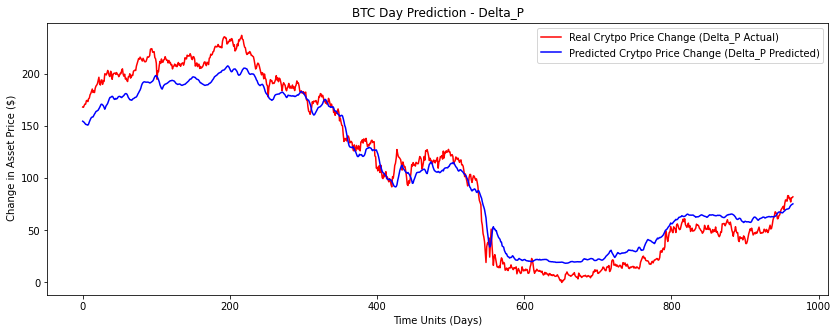

In [47]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

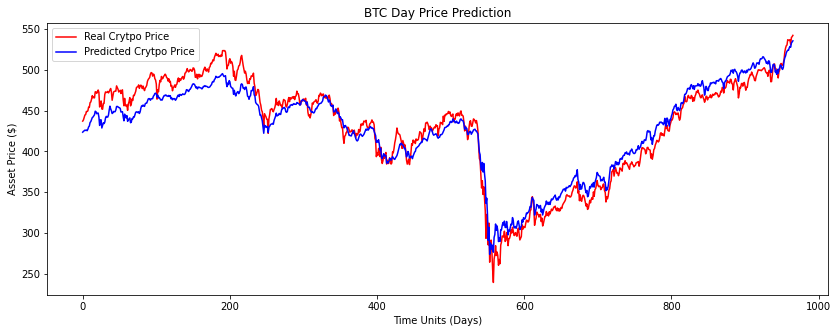

In [48]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [49]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 15.759195701098067


In [50]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum[0]/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.032334479732789856


In [51]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.7575129533678756
